# Correlation

Dependence between two numerical variable is studied using the correlation coefficient and scatter chart.

In [1]:
### Import the libraries needed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Style has effect on the layout of the graphics used
### Styles available can be listed using the command plt.style.available

plt.style.use('seaborn-whitegrid')

In [2]:
### Here we use data where corporate customers have answered opinions about their supplier compy
### Scale: 0: Very bad, ... , 10: Excellent

df = pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/data3_en.xlsx') 

df.head()

,number,delivery,price,flexibility,company image,service,staff,quality,overall
0,1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,4.2
1,2,1.8,3.0,6.3,6.6,2.5,4.0,8.4,4.3
2,3,3.4,5.2,5.7,6.0,4.3,2.7,8.2,5.2
3,4,2.7,1.0,7.1,5.9,1.8,2.3,7.8,3.9
4,5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,6.8


In [3]:
### Omit the column called number

df = df.drop('number', axis = 1)

In [4]:
### Calculate the correlation coefficients

df.corr()

,delivery,price,flexibility,company image,service,staff,quality,overall
delivery,1.000000,-0.349225,0.509295,0.050414,0.611901,0.077115,-0.482631,0.650632
price,-0.349225,1.000000,-0.487213,0.272187,0.512981,0.186243,0.469746,0.028395
flexibility,0.509295,-0.487213,1.000000,-0.116104,0.066617,-0.034316,-0.448112,0.524814
company image,0.050414,0.272187,-0.116104,1.000000,0.298677,0.788225,0.199981,0.475934
service,0.611901,0.512981,0.066617,0.298677,1.000000,0.240808,-0.055161,0.631233
staff,0.077115,0.186243,-0.034316,0.788225,0.240808,1.000000,0.177294,0.340909
quality,-0.482631,0.469746,-0.448112,0.199981,-0.055161,0.177294,1.000000,-0.283340
overall,0.650632,0.028395,0.524814,0.475934,0.631233,0.340909,-0.283340,1.000000


<AxesSubplot:>

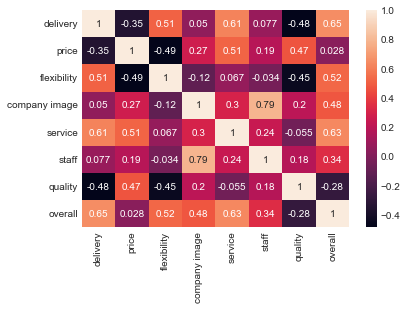

In [5]:
### The library seaborn contains a heatmap that colours correlation efficients

### The parameter annot = True show not only the colours but also the efficients

sns.heatmap(df.corr(), annot = True)

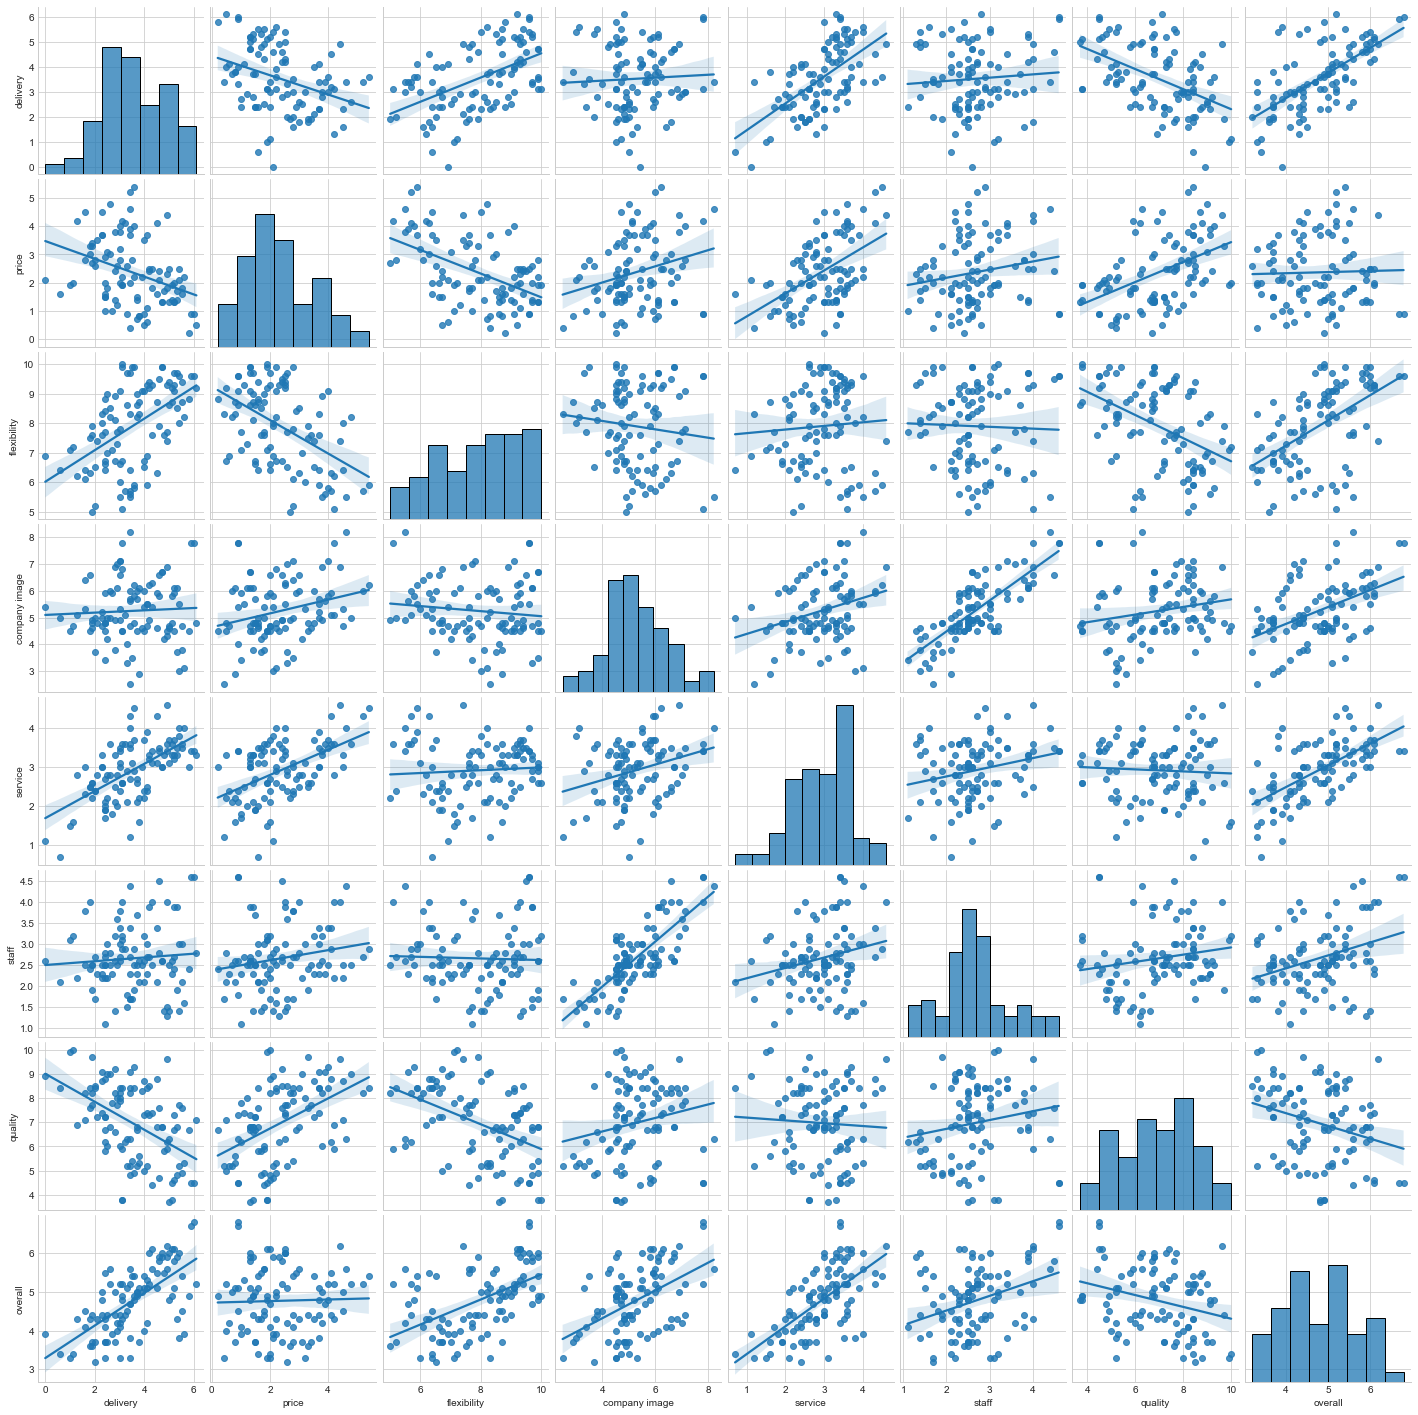

In [6]:
### Letäs study the correlations visually using scatter charts

### Note that it takes a while when calculating pairplots of such many variables

sns.pairplot(df, kind ='reg')

(3.0, 7.0)

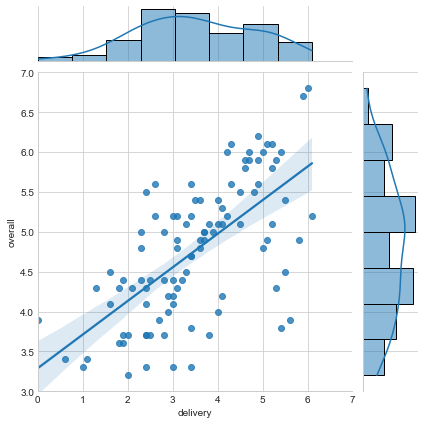

In [12]:
### Studying a single pair of variables as a scatter chart

ax1 = sns.jointplot(data = df, x = 'delivery', y = 'overall', kind = 'reg')

### Scaling the axes

ax1.ax_marg_x.set_xlim(0, 7)
ax1.ax_marg_y.set_ylim(3, 7)

## Are correlation coefficients statistically significant?

Correlation coefficients calculated from a sample can be too close to the zero in order they could be generalized to a bigger population from which the sample is a subset of. There may be a correlation caused by sampling error (randomness) in question.

Correlation coefficient is called *statistically significant* if results based on it can be generalized to a bigger population from which the sample is a subset of. Significancy of a correlation coefficient can be tested by calculating the so-called **p-value**. The smaller the p-value the more significant the correlation is. Usually p-value below 0,05 (5 %) is considered a sign of statistically significant correlation.

P-value corresponding to a correlation coefficient can be calculated using the test **pearsonr** intended for that.

In the next example the correlation between different factors and overall satisfaction. The function pearsonr returns two values, the correlation coefficient and the p-value.

In [14]:
from scipy.stats import pearsonr
for var in df:
    print(var, pearsonr(df['overall'], df[var]))

delivery (0.6506323301389191, 2.354357209803324e-13)
price (0.028394665880510234, 0.7791450989655391)
flexibility (0.5248141510750397, 2.0815396346392862e-08)
company image (0.4759338314260012, 5.599028749180165e-07)
service (0.631232901641948, 1.917952074232071e-12)
staff (0.3409093027606839, 0.0005188847493396814)
quality (-0.28333980318451, 0.004282584841192087)
overall (1.0, 0.0)


According to the calculations all the factors but the price level have significant correlation with overall satisfaction.

In case there are missing values in the data, the p-value of a correlation coefficient cannot be calculated unless the rows with missing values are removed. So if there are missing values, the following testing should be performed.

In [15]:
for var in df:
    df_dropna = df.dropna(subset = [var, 'overall'])
    print(var, pearsonr(df_dropna['overall'], df_dropna[var]))

delivery (0.6506323301389191, 2.354357209803324e-13)
price (0.028394665880510234, 0.7791450989655391)
flexibility (0.5248141510750397, 2.0815396346392862e-08)
company image (0.4759338314260012, 5.599028749180165e-07)
service (0.631232901641948, 1.917952074232071e-12)
staff (0.3409093027606839, 0.0005188847493396814)
quality (-0.28333980318451, 0.004282584841192087)
overall (1.0, 0.0)


Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>